&copy; Copyright 2016 Dr Marta Milo, University of Sheffield. 


# Week 5 Practical 


This Notebook contains practical assignments for Week 5. 

This is a guidance on how to implement basic *workflow* for gene expression data analysis. The following steps will be implemented so to generate the full analysis of Affymetrix gene expression data. 

* **Step1**: Load packages with data from Bioconductor and/or access it from file in the data directory
* **Step 2**: Arrange the data in an affybatch using Bioconductor commands. Annotate the PhenoData
* **Step 3**: Analysis of gene expression data with different methods and normalisation techniques
* **Step 4**: Diagnostics of the data with plotting techniques
* **Step 5**: Basic use of limma and puma for Differential Expression Analysis
* **Step 6**: Visualisation of the data with PCA
* **Step 7**: Hierarchical clustering of DE (Differentially Expressed) genes
* **Step 8**: Functional analysis of DE targets using PANTHER or DAVID
* **Step 9**: Pathway analysis using PANTHER



**We will be plotting large amounts of data. To avoid problems with file size, you should run the following line which changes plot outputs to small .png files**


In [2]:
options(jupyter.plot_mimetypes ='image/png')

## Step1: Load packages with data from Bioconductor and/or access it from file in the data directory

Load data from the data directory `data_wk5`

In [4]:
options(jupyter.plot_mimetypes ='image/png')

In [3]:
setwd("~/Autumn2016/Week5/data_wk_5")
getwd()

[1] "/projects/81b488df-6f86-4914-a3a2-03e1fb248f11/Autumn2016/Week5/data_wk_5"

In [4]:

load("estrogen_data.RDA")
ls()
library(affy) # activates the package affy

[1] "affybatch.estrogen"

Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, as.vector, cbind, colnames,
    do.call, duplicated, eval, evalq, Filter, Find, get, grep, grepl,
    intersect, is.unsorted, lapply, lengths, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unlist, unsplit

Loading required package: Biobase
Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To c

## Step 2: Arrange the data in an affybatch using Bioconductor commands. Annotate the PhenoData

In [9]:
phenoData(affybatch.estrogen)

pData(affybatch.estrogen)

An object of class 'AnnotatedDataFrame'
  sampleNames: low10-1.cel low10-2.cel ... high48-2.cel (8 total)
  varLabels: estrogen time.h
  varMetadata: labelDescription

estrogen time.h
low10-1.cel  absent   10    
low10-2.cel  absent   10    
high10-1.cel present  10    
high10-2.cel present  10    
low48-1.cel  absent   48    
low48-2.cel  absent   48    
high48-1.cel present  48    
high48-2.cel present  48

There is no need to reannotate since the annotation is clear and explicatory. 

## Step 3: Analysis of gene expression data with different methods and normalisation techniques


In [5]:
load("eset_puma.RDA")

ls() # check teh object in teh workspace

eset_rma<-affy::rma(affybatch.estrogen) # calculate gene expression with RMA
show(eset_rma) # visualise the object structure

show(eset_estrogen_puma) #loading puma data from preprocessed to avoid processing time

# extracting gene expression data from eset

e_rma<-exprs(eset_rma) #rma estimation  
e_puma<-exprs(eset_estrogen_puma) # puma estimation

[1] "affybatch.estrogen" "eset_estrogen_puma"

Warning message:
“replacing previous import ‘AnnotationDbi::tail’ by ‘utils::tail’ when loading ‘hgu95av2cdf’”Warning message:
“replacing previous import ‘AnnotationDbi::head’ by ‘utils::head’ when loading ‘hgu95av2cdf’”


Background correcting
Normalizing
Calculating Expression
ExpressionSet (storageMode: lockedEnvironment)
assayData: 12625 features, 8 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: low10-1.cel low10-2.cel ... high48-2.cel (8 total)
  varLabels: estrogen time.h
  varMetadata: labelDescription
featureData: none
experimentData: use 'experimentData(object)'
Annotation: hgu95av2 


Loading required package: puma
Loading required package: oligo
Loading required package: oligoClasses
Welcome to oligoClasses version 1.32.0

Attaching package: ‘oligoClasses’

The following object is masked from ‘package:affy’:

    list.celfiles

Loading required package: Biostrings
Loading required package: S4Vectors
Loading required package: stats4
Loading required package: IRanges
Loading required package: XVector
Welcome to oligo version 1.34.2

Attaching package: ‘oligo’

The following objects are masked from ‘package:affy’:

    intensity, MAplot, mm, mm<-, mmindex, pm, pm<-, pmindex,
    probeNames, rma

Loading required package: mclust
Package 'mclust' version 5.2
Type 'citation("mclust")' for citing this R package in publications.


exprReslt (storageMode: lockedEnvironment)
assayData: 12625 features, 8 samples 
  element names: exprs, se.exprs 
protocolData: none
phenoData
  sampleNames: low10-1.cel low10-2.cel ... high48-2.cel (8 total)
  varLabels: estrogen time.h
  varMetadata: labelDescription
featureData: none
experimentData: use 'experimentData(object)'
Annotation: hgu95av2 


In [14]:
ls()

[1] "affybatch.estrogen" "e_puma"             "e_rma"             
[4] "eset_estrogen_puma" "eset_rma"

## Step 4: Diagnostics of the data with plotting techniques

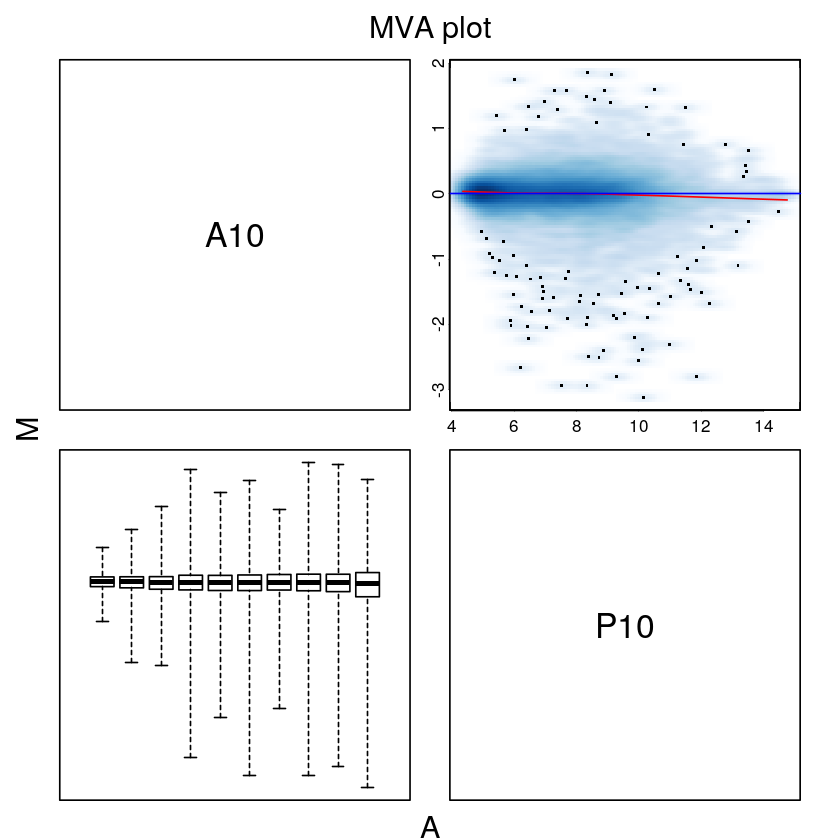

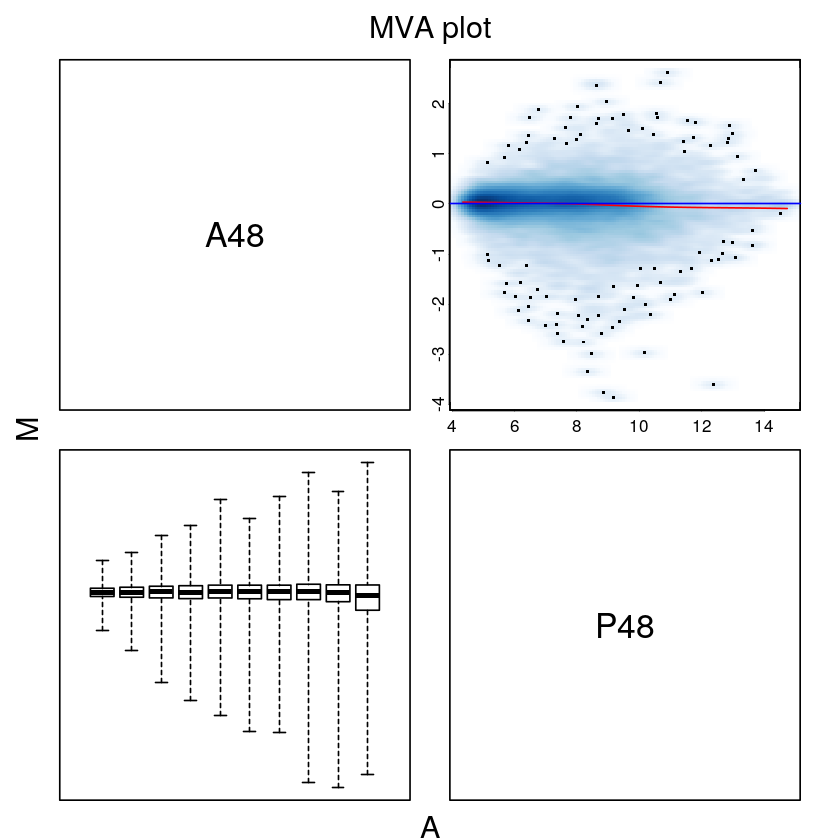

In [6]:
groups=c("A10","A10","P10","P10","A48","A48","P48","P48")
table_estrogen=data.frame(sampleNames(eset_rma),groups)
group10hr=factor(groups[1:4])
group48hr=factor(groups[5:8])
MAplot(e_rma[,1:4], pairs=TRUE, groups=group10hr)
MAplot(e_rma[,5:8], pairs=TRUE, groups=group48hr)

We can repeat the same plotting for puma data.

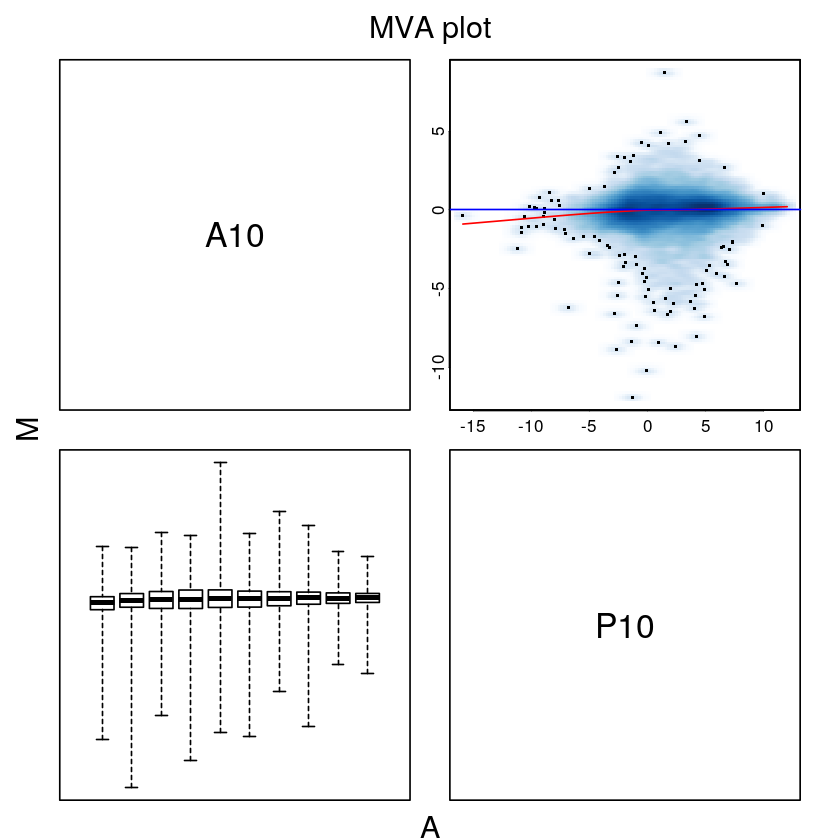

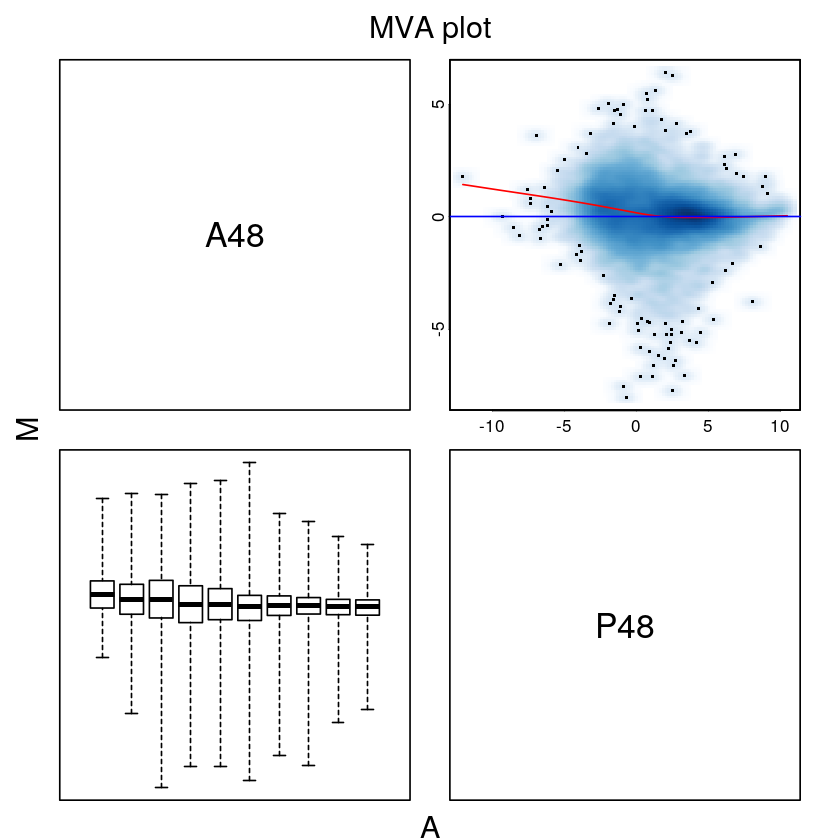

In [7]:
groups=c("A10","A10","P10","P10","A48","A48","P48","P48")
table_estrogen=data.frame(sampleNames(eset_rma),groups)
group10hr=factor(groups[1:4])
group48hr=factor(groups[5:8])
MAplot(e_puma[,1:4], pairs=TRUE, groups=group10hr)
MAplot(e_puma[,5:8], pairs=TRUE, groups=group48hr)

We can also use boxplots and densities to visualise the data. it is possible to write a small function that is able to plot all the densities on the same plot to check the spread. 

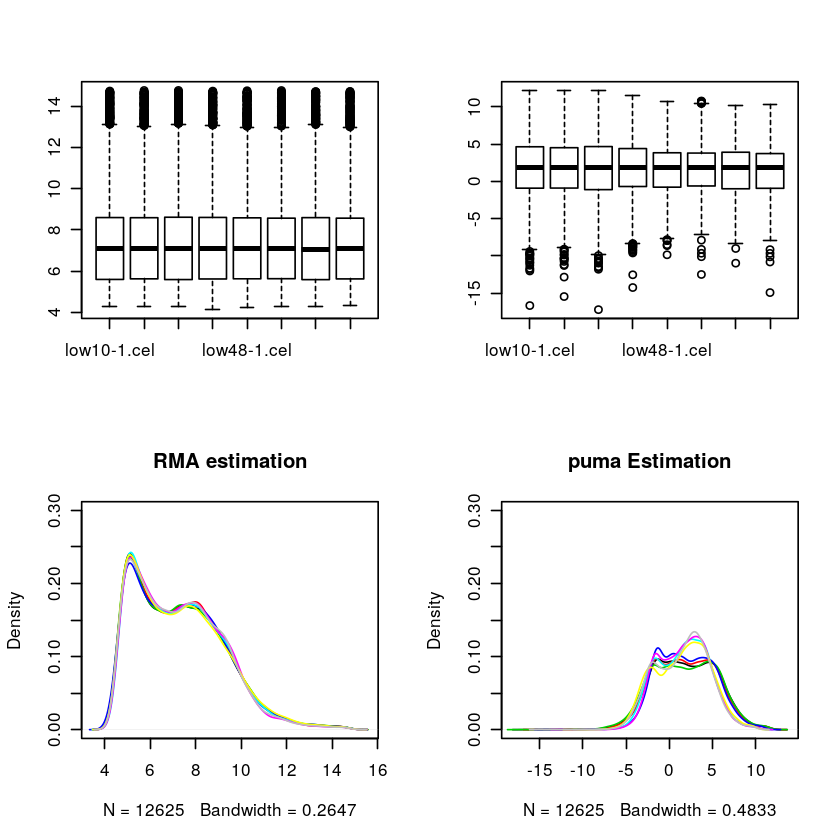

In [8]:
i=1 # initialise the counter

# size is the sample size
# ex are the expression values
# title is a string describing the data 

plotdens<-function(size,ex,main){
    plot(density(ex[,1]), main=main, ylim=c(0,0.30))
    for (i in 2:size){   
    lines(density(ex[,i]), col=i)
    } 
}



par(mfrow=c(2,2))
boxplot(e_rma)
boxplot(e_puma)


#par(mfrow=c(1,2))
plotdens(8,e_rma,"RMA estimation")
plotdens(8,e_puma,"puma Estimation")

this diagnostics shows the difference in the two methods. in this particular data set RMA seems to be more appropriate because the change in gene expressio are only in few genes and the normalisation methods used by RMA helps to spread them out better. 


## Step 5: Basic use of limma and puma for Differential Expression Analysis

Before performing any type of DE analysis you need to combine the data as explained in the lectures. For `puma` we combine the data using an bayesian Hierarchical model, which might take some time when implemented on data with the comand `pumaCombImproved()`.
Load the puma combined data for this exercise from the data folder using the command `load("eset_puma_comb.RDA")`.


We have seen in week 4 initial use of `limma` for DE analysis. Remember the three core steps of `limma`
* **Step 1**: build the design contrast matrix
* **Step 2**: fit the linear model
* **Step 3**: calculate the p-values and FDRs with a empirical Bayes test
we used built-in function in `puma` to create the design and constrast matrix. 

Extract the top DE genes using `topTable()` as seen in week10. Explore the results. You might want to extract more genes from using topTable... look at the parameters.( n=100, for examples...)


Rembenber the threshold for selecting FC after they passed the significance threhold is FC<-1 and FC>1. Assign the thresholds to variables in the script, this helps to modify them and keep the code correct. In this way you will change only the value of one variable and not in all instances when it is recalled.  

In [9]:
load("eset_puma_comb.RDA")
ls()

show(eset_estrogen_comb)


[1] "affybatch.estrogen" "e_puma"             "e_rma"             
 [4] "eset_estrogen_comb" "eset_estrogen_puma" "eset_rma"          
 [7] "group10hr"          "group48hr"          "groups"            
[10] "i"                  "plotdens"           "table_estrogen"

ExpressionSet (storageMode: lockedEnvironment)
assayData: 12625 features, 4 samples 
  element names: exprs, se.exprs 
protocolData: none
phenoData
  sampleNames: absent.10 present.10 absent.48 present.48
  varLabels: estrogen time.h
  varMetadata: labelDescription
featureData: none
experimentData: use 'experimentData(object)'
Annotation:  


In [44]:
pData(eset_estrogen_comb)

estrogen time.h
absent.10  absent   10    
present.10 present  10    
absent.48  absent   48    
present.48 present  48

In [10]:
library(limma)

group<-factor(c("A10","P10","A48","P48"))
design<-createDesignMatrix(eset_estrogen_puma)
colnames(design)<-c("A10","P10","A48","P48")

contrastmatrix<-makeContrasts(P10-A10,P48-A48,levels=design)

fit<-lmFit(eset_estrogen_puma,design)
fit2<-contrasts.fit(fit,contrasts=contrastmatrix)
fit3<-eBayes(fit2)

topDEGenes<-topTable(fit3, coef=1, adjust="BH", n=100, lfc=1)
topDEGenes


Attaching package: ‘limma’

The following object is masked from ‘package:oligo’:

    backgroundCorrect

The following object is masked from ‘package:BiocGenerics’:

    plotMA



logFC     AveExpr     t         P.Value      adj.P.Val   B       
910_at     8.036948  3.7646634   23.08715 1.888496e-07 0.001985701 6.936542
40249_at  -8.729950  2.0120422  -20.89914 3.565580e-07 0.001985701 6.579962
1884_s_at  6.251022  4.1757812   19.37656 5.772419e-07 0.001985701 6.285803
1376_at   10.231528  1.1616413   19.11610 6.291329e-07 0.001985701 6.231089
38131_at   7.374587  0.1058839   18.21730 8.543815e-07 0.002065401 6.031332
33834_at   5.977635  3.3732351   17.82330 9.815766e-07 0.002065401 5.938074
41400_at   6.787461  4.5064870   16.04114 1.912689e-06 0.002755520 5.467031
35141_at   5.885268  3.2815956   15.82433 2.084383e-06 0.002755520 5.403652
38827_at   5.465205  2.8441721   15.79655 2.107644e-06 0.002755520 5.395426
846_s_at  -4.728466  4.4473863  -15.70937 2.182590e-06 0.002755520 5.369462
39651_at   5.375880  2.2805498   15.40343 2.470985e-06 0.002782300 5.276451
37458_at  11.907619 -1.1274854   15.20081 2.686155e-06 0.002782300 5.213185
1178_at    4.674778  1.8125621   15.04617 2.864943e-06 0.002782300 5.163984
1515_at    4.617450  3.9556725   14.83659 3.129562e-06 0.002822195 5.096000
1516_g_at  5.037478  4.8689269   14.10040 4.309795e-06 0.003426987 4.844736
37899_at   6.457728  2.1020714   14.01346 4.480427e-06 0.003426987 4.813723
36134_at   4.703342  4.6553292   13.79161 4.952232e-06 0.003426987 4.733239
1687_s_at -5.616400  2.6886560  -13.57700 5.463832e-06 0.003426987 4.653494
33255_at   4.418799  3.6567584   13.57560 5.467365e-06 0.003426987 4.652967
33145_at   6.418118  1.2429223   13.43576 5.833692e-06 0.003426987 4.599977
480_at     5.123468  3.7960139   13.26079 6.332493e-06 0.003426987 4.532509
160043_at  5.530680  1.9803787   13.22987 6.425637e-06 0.003426987 4.520451
31798_at   4.674595  7.8878080   13.21451 6.472507e-06 0.003426987 4.514444
40117_at   4.116956  5.7383205   13.11813 6.775694e-06 0.003426987 4.476521
1670_at    4.725742  0.9361208   13.07020 6.932536e-06 0.003426987 4.457509
37142_at   4.701153  1.9840381   12.97991 7.239447e-06 0.003426987 4.421419
1823_g_at  5.287398  2.8174668   12.93003 7.415695e-06 0.003426987 4.401323
1536_at    8.424466  0.6152671   12.82946 7.786250e-06 0.003426987 4.360464
39642_at   5.958729  3.2935645   12.80700 7.871890e-06 0.003426987 4.351275
33252_at   4.734155  3.9782791   12.66069 8.457024e-06 0.003467966 4.290844
⋮         ⋮         ⋮           ⋮         ⋮            ⋮           ⋮       
71         2.979578  4.50477114  9.489692 5.000255e-05 0.008891299 2.692285
72         5.586981  3.40342371  9.443783 5.149757e-05 0.009029955 2.664340
73         2.726909  3.04927801  9.395904 5.311154e-05 0.009142241 2.635024
74         3.903704  2.31585545  9.380320 5.364931e-05 0.009142241 2.625444
75        -3.132154  0.04633481 -9.361407 5.431034e-05 0.009142241 2.613792
76        -3.692927  1.29821956 -9.246016 5.855136e-05 0.009713231 2.542099
77         3.237684  1.37609851  9.218611 5.961355e-05 0.009713231 2.524918
78        -2.972198  4.38983837 -9.190290 6.073445e-05 0.009713231 2.507101
79         8.375659 -1.03111421  9.180698 6.111956e-05 0.009713231 2.501052
80        -3.485976  2.89742372 -9.170078 6.154919e-05 0.009713231 2.494346
81        -2.796399  5.15712202 -9.096827 6.460853e-05 0.009841719 2.447845
82         3.076050  1.02474139  9.096034 6.464258e-05 0.009841719 2.447339
83        -3.453763  3.05121670 -9.094652 6.470199e-05 0.009841719 2.446457
84         5.535650  0.88317026  9.068970 6.581734e-05 0.009892189 2.430048
85         2.952393  2.75663126  9.029398 6.757936e-05 0.010037522 2.404656
86         3.605387  2.12754764  8.998065 6.901280e-05 0.010131240 2.384461
87        -3.243412  0.72301174 -8.815655 7.808245e-05 0.011330931 2.265273
88         2.907751  2.97277118  8.788537 7.954401e-05 0.011411854 2.247315
89        -4.916477  2.03655322 -8.750037 8.167305e-05 0.011568802 2.221713
90        -2.802935  6.27187921 -8.735908 8.247066e-05 0.011568802 2.212285
91         2.607079 -1.16132354  8.702205 8.440957e-05 0.0

In [50]:
dim(topDEGenesrma)

[1] 100   6

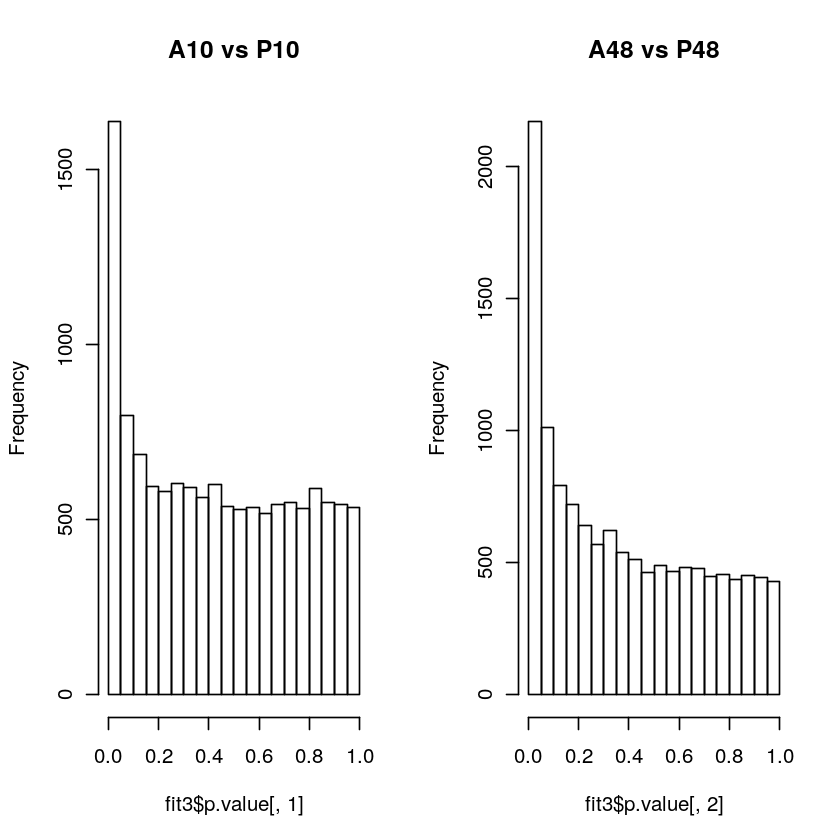

In [11]:
par(mfrow=c(1,2))
hist(fit3$p.value[,1], main="A10 vs P10")
hist(fit3$p.value[,2], main="A48 vs P48")

Always make sure that the p-values are distributed as expected. Use the `hist()` to diagnose this.

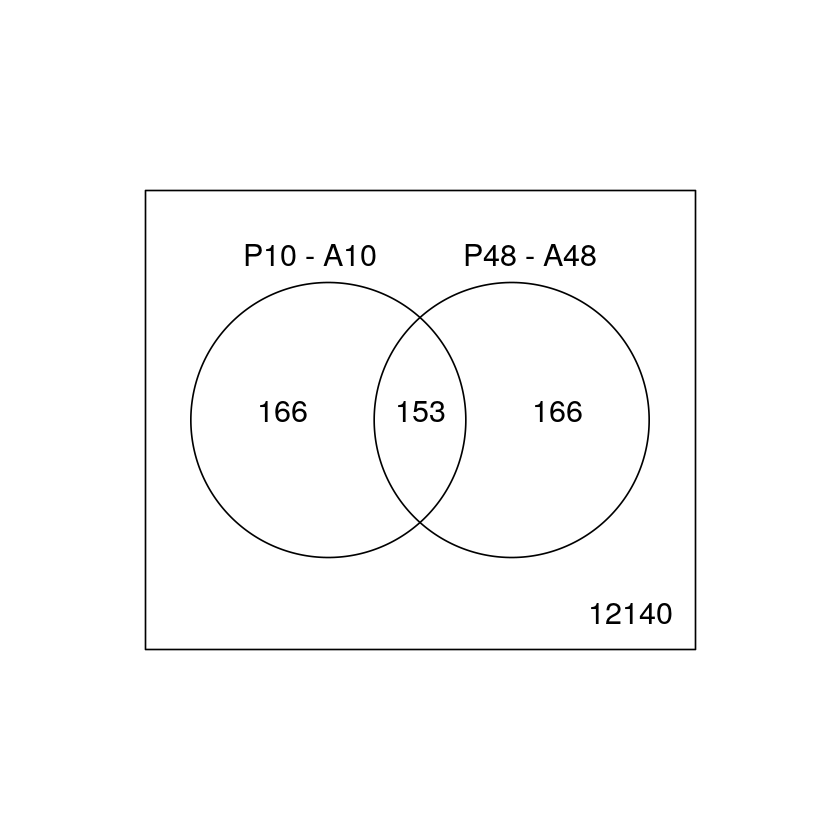

In [12]:
results_puma<-decideTests(fit3, method="global",lfc=1) 
vennDiagram(results_puma)

When the data is not combined, there are 2311 potential DE genes identified initially. 

However, only 153 of those are DE in both times (10 and 48 hours after estrogen administration). 






*Combined data*:

In [13]:
pumaDERes<-pumaDE(eset_estrogen_comb)

In [56]:
getwd()

[1] "/projects/81b488df-6f86-4914-a3a2-03e1fb248f11/Autumn2016/Week5/data_wk_5"

In [58]:
write.reslts(pumaDERes, file="pumaDERes")

In [45]:
# annotation of probe_ids

library(hgu95av2.db)
library(annotate)

geneProbes<-as.character(rownames(topDEGenes))
annotated_list<-select(hgu95av2.db, geneProbes,c("SYMBOL","GENENAME"))
annotated_list


'select()' returned 1:many mapping between keys and columns


PROBEID    SYMBOL  
1   910_at     TK1     
2   40249_at   ACHE    
3   1884_s_at  PCNA    
4   1376_at    LIG1    
5   38131_at   PTGES   
6   33834_at   CXCL12  
7   41400_at   TK1     
8   35141_at   RNASEH2A
9   38827_at   AGR2    
10  846_s_at   BAK1    
11  39651_at   RECQL4  
12  37458_at   CDC45   
13  1178_at    DHFR    
14  1515_at    FEN1    
15  1516_g_at  FEN1    
16  37899_at   TYMS    
17  36134_at   OLFM1   
18  1687_s_at  BAK1    
19  33255_at   NASP    
20  33145_at   FANCA   
21  480_at     PKMYT1  
22  160043_at  MYBL1   
23  31798_at   TFF1    
24  40117_at   MCM6    
25  1670_at    TFDP1   
26  37142_at   GFRA1   
27  1823_g_at  RET     
28  1536_at    CDC6    
29  39642_at   ELOVL2  
30  33252_at   MCM3    
⋮   ⋮          ⋮       
91  1833_at    CDK2    
92  1368_at    IL1R1   
93  41646_at   TAOK3   
94  35401_s_at MMP17   
95  38735_at   KIAA0513
96  1462_s_at  POLD1   
97  33377_at   VTN     
98  33377_at   SEBOX   
99  38653_at   PMP22   
100 33724_at   BRCA1   
101 1700_at    BBC3    
102 1700_at    MIR3191 
103 1700_at    MIR3190 
104 36374_at   NA      
105 419_at     MKI67   
106 604_at     BRCA1   
107 635_s_at   PPP2R5B 
108 37485_at   SLC27A2 
109 1087_at    EPOR    
110 38551_at   L1CAM   
111 33785_at   ADGRB2  
112 31830_s_at SMTN    
113 37475_at   WDR62   
114 1802_s_at  ERBB2   
115 37686_s_at UNG     
116 34314_at   RRM1    
117 35312_at   MCM2    
118 36638_at   CTGF    
119 40425_at   EFNA1   
120 674_g_at   MTHFD1  
    GENENAME                                                                                                                               
1   thymidine kinase 1, soluble                                                                                                            
2   acetylcholinesterase (Yt blood group)                                                                                                  
3   proliferating cell nuclear antigen                                                                                                     
4   ligase I, DNA, ATP-dependent                                                                                                           
5   prostaglandin E synthase                                                                                                               
6   chemokine (C-X-C motif) ligand 12                                                                                                      
7   thymidine kinase 1, soluble                                                                                                            
8   ribonuclease H2, subunit A                                                                                                             
9   anterior gradient 2, protein disulphide isomerase family member                                                                        
10  BCL2-antagonist/killer 1                                                                                                               
11  RecQ helicase-like 4                                                                                                                   
12  cell division cycle 45                                                                                                                 
13  dihydrofolate reductase                                                                                                                
14  flap structure-specific endonuclease 1                                                                                                 
15  flap structure-specific endonuclease 1                                                                                                 
16  thymidylate synthetase                                                                                                                 
17  olfactomedin 1                                                                                                                      

In [60]:
dir()

[1] "eset_puma_comb.RDA"       "eset_puma.RDA"           
[3] "estrogen_data.RDA"        "pumaDERes_FCs.csv"       
[5] "pumaDERes_statistics.csv"

In [15]:
pumaDE_stat<-read.csv("pumaDERes_statistics.csv")

pumaDE_FC<-read.csv("pumaDERes_FCs.csv")

In [16]:
probeid <-pumaDE_stat[,1]
PPLR_10<-pumaDE_stat[,2]
PPLR_48<-pumaDE_stat[,5]
pumaRes<-data.frame(probeid,PPLR_10,PPLR_48)
pumaRes

probeid                  PPLR_10     PPLR_48     
1     1000_at                  0.241234126 2.463198e-01
2     1001_at                  0.514202609 4.422001e-01
3     1002_f_at                0.496000884 5.150520e-01
4     1003_s_at                0.511665162 4.804975e-01
5     1004_at                  0.495175511 5.997829e-01
6     1005_at                  0.014699066 2.572645e-07
7     1006_at                  0.505530344 3.500700e-01
8     1007_s_at                0.004937966 3.543343e-05
9     1008_f_at                0.484326246 4.000835e-01
10    1009_at                  0.898411573 9.999991e-01
11    100_g_at                 0.476230390 4.566063e-01
12    1010_at                  0.509810851 5.287254e-01
13    1011_s_at                0.568546937 9.734836e-01
14    1012_at                  0.283263781 7.703784e-02
15    1013_at                  0.379112457 3.815292e-01
16    1014_at                  0.525869829 6.737348e-01
17    1015_s_at                0.495761337 4.830234e-01
18    1016_s_at                0.516978149 4.126027e-01
19    1017_at                  0.495079953 5.555007e-01
20    1018_at                  0.500337437 4.200366e-01
21    1019_g_at                0.495913017 5.562102e-01
22    101_at                   0.503725803 5.003103e-01
23    1020_s_at                0.001666052 1.078318e-03
24    1021_at                  0.487189012 4.638177e-01
25    1022_f_at                0.501440757 5.572265e-01
26    1023_at                  0.505265148 4.900575e-01
27    1024_at                  0.326185182 4.284354e-02
28    1025_g_at                0.006481635 7.596741e-05
29    1026_s_at                0.498494488 4.773975e-01
30    1027_at                  0.507093019 5.214681e-01
⋮     ⋮                        ⋮           ⋮           
12596 AFFX-HUMRGE/M10098_3_at  0.6359230   0.381867147 
12597 AFFX-HUMRGE/M10098_5_at  0.5637680   0.445829723 
12598 AFFX-HUMRGE/M10098_M_at  0.5616022   0.463448747 
12599 AFFX-HUMTFRR/M11507_3_at 0.9733530   0.997648785 
12600 AFFX-HUMTFRR/M11507_5_at 0.7402457   0.426726327 
12601 AFFX-HUMTFRR/M11507_M_at 0.9074713   0.987009542 
12602 AFFX-LysX-3_at           0.4511598   0.987122612 
12603 AFFX-LysX-5_at           0.4730838   0.074916801 
12604 AFFX-LysX-M_at           0.4971029   0.494956215 
12605 AFFX-M27830_3_at         0.5055728   0.507455602 
12606 AFFX-M27830_5_at         0.9659439   0.002687213 
12607 AFFX-M27830_M_at         0.5319316   0.009513745 
12608 AFFX-MurFAS_at           0.5183827   0.773723688 
12609 AFFX-MurIL10_at          0.5047218   0.460732981 
12610 AFFX-MurIL2_at           0.5078805   0.500040887 
12611 AFFX-MurIL4_at           0.5408163   0.416816772 
12612 AFFX-PheX-3_at           0.4986235   0.107026910 
12613 AFFX-PheX-5_at           0.4934398   0.504074257 
12614 AFFX-PheX-M_at           0.5029684   0.480489737 
12615 AFFX-ThrX-3_at           0.5079974   0.488626587 
12616 AFFX-ThrX-5_at           0.4978931   0.524709259 
12617 AFFX-ThrX-M_at           0.5146307   0.480370019 
12618 AFFX-TrpnX-3_at          0.4913410   0.479962136 
12619 AFFX-TrpnX-5_at          0.5022625   0.770497014 
12620 AFFX-TrpnX-M_at          0.4980655   0.443630503 
12621 AFFX-YEL002c/WBP1_at     0.4734277   0.429315991 
12622 AFFX-YEL018w/_at         0.4970822   0.497094473 
12623 AFFX-YEL021w/URA3_at     0.4934130   0.280348052 
12624 AFFX-YEL024w/RIP1_at     0.6385294   0.127866879 
12625 AFFX-hum_alu_at          0.1115671   0.012482693

In [17]:
# Applying filters

down_10<-pumaRes[pumaRes$PPLR_10<=0.2,1]
up_10<-pumaRes[pumaRes$PPLR_10>=0.8,1]
down_48<-pumaRes[pumaRes$PPLR_48<=0.2,1]
up_48<-pumaRes[pumaRes$PPLR_48>=0.8,1]



downDE<-data.frame(match(down_48,down_10))
downDE<-downDE[!is.na(downDE)]
upDE<-data.frame(match(up_48,up_10))
upDE<-upDE[!is.na(upDE)]

In [18]:
# checking results

DE<-data.frame(match(downDE,upDE))
DE<-DE[!is.na(DE)]
length(DE)



[1] 600

In [22]:
head(pumaDE_FC)

X         present.10_vs_absent.10 absent.48_vs_absent.10
1 1000_at   -0.1978593026           -0.257689036          
2 1001_at    0.0129763857            0.120625621          
3 1002_f_at -0.0006266813           -0.002866694          
4 1003_s_at  0.0049641759            0.021073567          
5 1004_at   -0.0021290036            0.004010162          
6 1005_at   -1.6554868419           -0.285989582          
  present.48_vs_present.10 present.48_vs_absent.48 estrogen_absent_vs_present
1 -1.721282e-01            -0.112298496             0.1550788993             
2  5.754748e-02            -0.050101758             0.0185626860             
3  9.711845e-05             0.002337131            -0.0008552248             
4  7.916403e-03            -0.008192989             0.0016144064             
5  4.918754e-02             0.043048375            -0.0204596859             
6 -7.113944e-01            -2.080891611             1.8681892262             
  time.h_10_vs_48 Int__estrogen_absent.present_vs_time.h_10.48
1  0.214908632     0.042780403                                
2 -0.089086550    -0.031539072                                
3  0.001384788     0.001481906                                
4 -0.014494985    -0.006578582                                
5 -0.026598851     0.022588690                                
6  0.498691967    -0.212702384

In [28]:
geneProbes<-as.character(pumaDE_FC$X)
annotated_list<-select(hgu95av2.db, geneProbes,c("SYMBOL","GENENAME"))

DEGenes=annotated_list[pumaRes[DE,1],]
DEGenes

dim(DEGenes)

'select()' returned 1:many mapping between keys and columns


PROBEID     SYMBOL 
2   1001_at     TIE1   
3   1002_f_at   CYP2C19
4   1003_s_at   CXCR5  
5   1004_at     CXCR5  
6   1005_at     DUSP1  
7   1006_at     MMP10  
8   1007_s_at   DDR1   
9   1007_s_at   MIR4640
10  1008_f_at   EIF2AK2
13  1010_at     MAPK11 
14  1011_s_at   YWHAE  
15  1012_at     KAT2B  
18  1015_s_at   LIMK1  
19  1016_s_at   IL13RA2
20  1017_at     MSH6   
21  1018_at     WNT10B 
22  1019_g_at   WNT10B 
12  100_g_at    RABGGTA
24  1020_s_at   CIB1   
30  1026_s_at   COL11A2
31  1027_at     COL11A2
32  1028_at     TOP3A  
33  1029_s_at   TXK    
23  101_at      DYRK4  
35  1030_s_at   TOP1   
36  1031_at     SRPK1  
37  1032_at     CXCR2  
38  1033_g_at   CXCR2  
39  1034_at     TIMP3  
40  1035_g_at   TIMP3  
⋮   ⋮           ⋮      
571 1594_at     POLR2C 
572 1595_at     TEK    
573 1596_g_at   TEK    
574 1597_at     GAS6   
575 1598_g_at   GAS6   
576 1599_at     CDKN3  
577 159_at      VEGFC  
578 160020_at   MMP14  
579 160022_at   CSF1R  
580 1593_at     FGF2   
581 160024_at   CDK10  
582 160025_at   TGFA   
583 160026_at   PRKX   
584 160027_s_at IGF2R  
585 160028_s_at RET    
586 160029_at   PRKCB  
587 160030_at   GHR    
588 160031_at   CDH3   
589 160032_at   IL6R   
590 160033_s_at XRCC1  
591 160023_at   WNT2   
592 160035_at   CEACAM7
593 160036_at   ESRRB  
594 160037_at   MMP15  
595 160038_s_at INS    
596 160042_s_at HOXB6  
597 160034_s_at FANCC  
598 1601_s_at   IGFBP5 
599 1602_at     PRKCI  
600 1603_g_at   PRKCI  
    GENENAME                                                                       
2   tyrosine kinase with immunoglobulin-like and EGF-like domains 1                
3   cytochrome P450, family 2, subfamily C, polypeptide 19                         
4   chemokine (C-X-C motif) receptor 5                                             
5   chemokine (C-X-C motif) receptor 5                                             
6   dual specificity phosphatase 1                                                 
7   matrix metallopeptidase 10                                                     
8   discoidin domain receptor tyrosine kinase 1                                    
9   microRNA 4640                                                                  
10  eukaryotic translation initiation factor 2-alpha kinase 2                      
13  mitogen-activated protein kinase 11                                            
14  tyrosine 3-monooxygenase/tryptophan 5-monooxygenase activation protein, epsilon
15  K(lysine) acetyltransferase 2B                                                 
18  LIM domain kinase 1                                                            
19  interleukin 13 receptor, alpha 2                                               
20  mutS homolog 6                                                                 
21  wingless-type MMTV integration site family, member 10B                         
22  wingless-type MMTV integration site family, member 10B                         
12  Rab geranylgeranyltransferase, alpha subunit                                   
24  calcium and integrin binding 1 (calmyrin)                                      
30  collagen, type XI, alpha 2                                                     
31  collagen, type XI, alpha 2                                                     
32  topoisomerase (DNA) III alpha                                                  
33  TXK tyrosine kinase                                                            
23  dual-specificity tyrosine-(Y)-phosphorylation regulated kinase 4               
35  topoisomerase (DNA) I                                                          
36  SRSF protein kinase 1                                                          
37  chemokine (C-X-C motif) receptor 2                                             
38  chemokine (C-X-C motif) receptor 2                                             
39  TIMP metallopeptidase inhibitor 3                                           

[1] 600   3

As you can see from the presence of NA puma as discovered different DE genes from the ones annotated with RMA. 

## Step 6: Pricipal component analysis. 



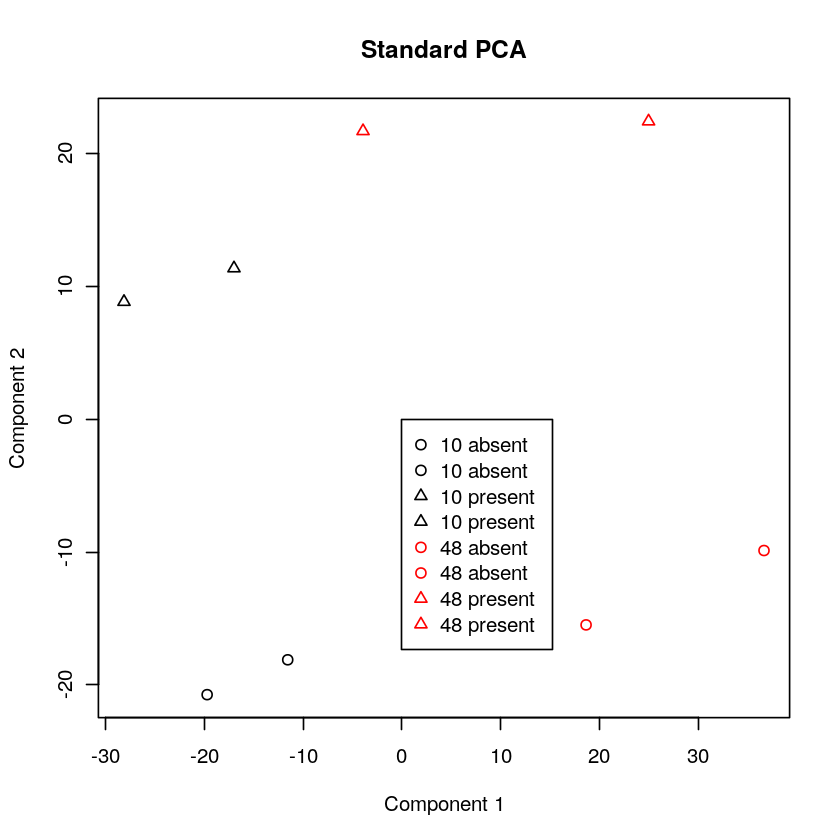

In [68]:
pca_estrogen <- prcomp(t(e_rma)) # performing standard PCA


plot(pca_estrogen$x, xlab="Component 1", ylab="Component 2", 
     pch=unclass(as.factor(pData(eset_rma)[,1])), 
     col=unclass(as.factor(pData(eset_rma)[,2])), main="Standard PCA")

groups<-paste(eset_rma$time.h, eset_rma$estrogen, sep =" ")

legend(0,0,groups,pch=unclass(as.factor(pData(eset_rma)[,1]))
, col=unclass(as.factor(pData(eset_rma)[,2])))

Iteration number: 1
Iteration number: 2
Iteration number: 3
Iteration number: 4
Iteration number: 5
Iteration number: 6


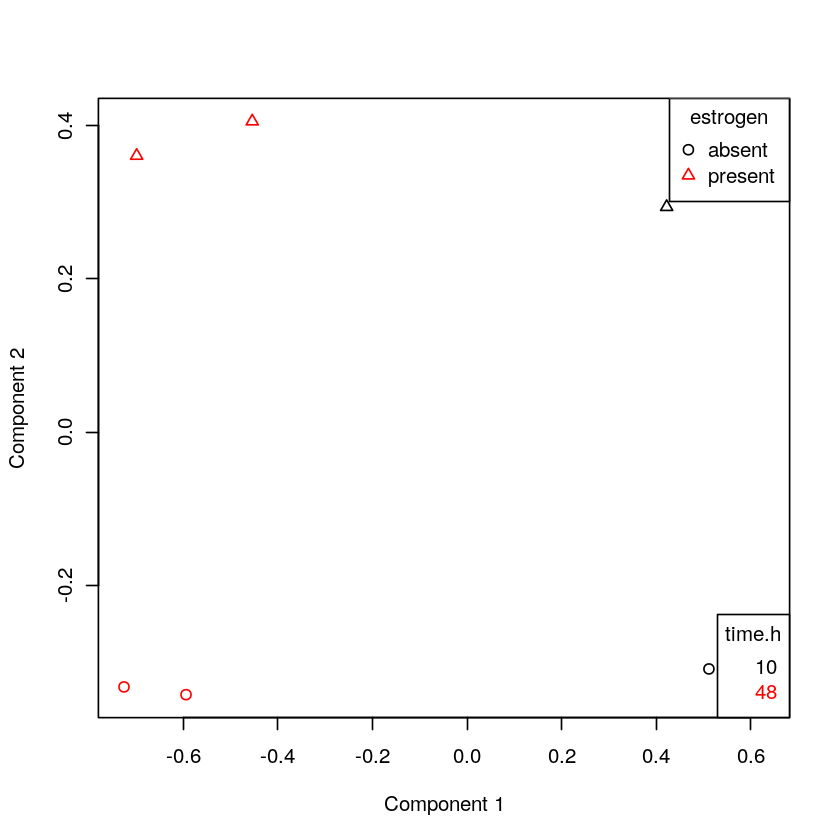

In [69]:
# you can perform PCA using the probabilistic framework 
# below are the commands for doing so.

pumapca_estrogen=pumaPCA(eset_estrogen_puma)
plot(pumapca_estrogen)

## Step 7: Hierarchical clustering of DE (Differentially Expressed) genes

To perform this we need to activate a library called `gplots`. We will use the command `heatmap.2()`.
We do clustering a the selected genes from our DE analysis this is to search for patterns in of differentially regulatend pathways.

For the RMA processed we can do:


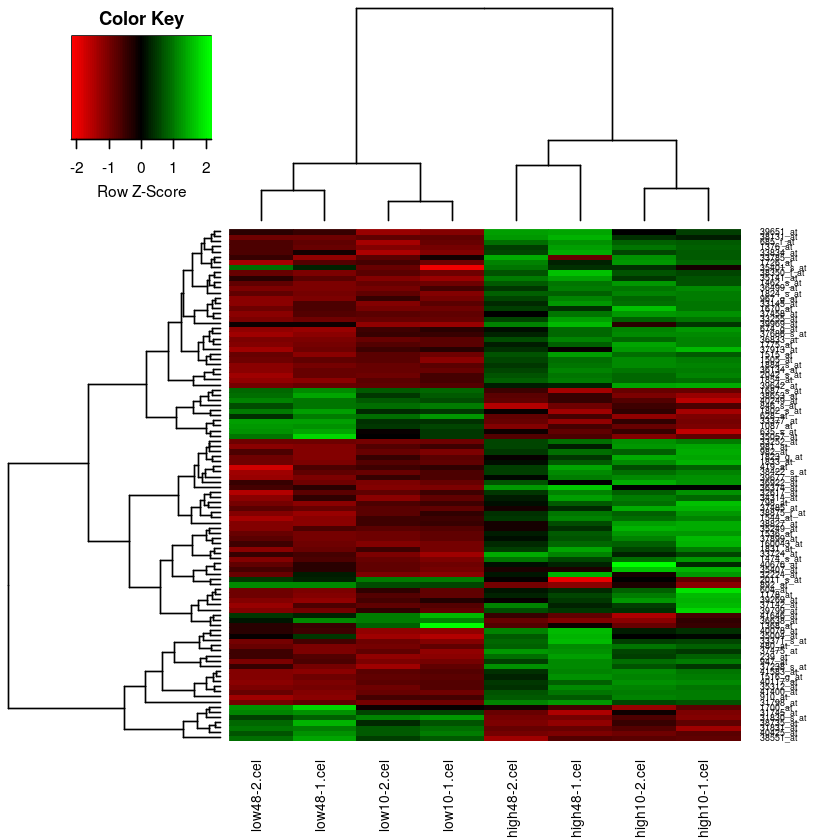

In [31]:
library(gplots)

# find the IDs that belong to the DE genes.
tID<-rownames(topDEGenes)
ind<-1
j<-1
for (i in 1: length(tID)) {
	ind[j]<-which(rownames(eset_rma)==tID[i],arr.ind=TRUE)
	j<-j+1
}

# ind is the vector with all the indexes
topExpr<-e_rma[ind,]
heatmap.2(topExpr, col=redgreen(75), scale="row",
key=TRUE, symkey=FALSE, density.info="none", trace="none", cexRow=0.5, cexCol=0.8)

'select()' returned 1:many mapping between keys and columns


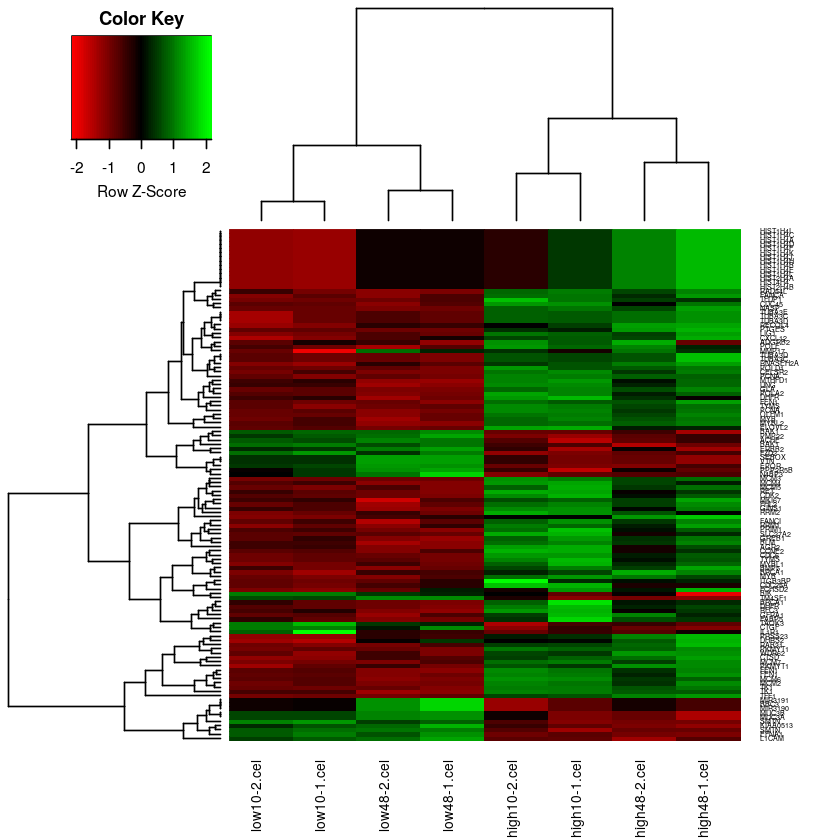

In [77]:
# ind is the vector with all the indexes
geneProbes<-rownames(topDEGenes)
annotated_list<-select(hgu95av2.db, geneProbes,"SYMBOL")
indx<-match(annotated_list$PROBEID,rownames(topDEGenes))

tID<-rownames(topDEGenes)[indx]
ind<-1
j<-1
for (i in 1: length(tID)) {
	ind[j]<-which(rownames(eset_rma)==tID[i],arr.ind=TRUE)
	j<-j+1
}

# ind is the vector with all the indexes
topExpr<-e_rma[ind,]
rownames(topExpr)<-annotated_list$SYMBOL

heatmap.2(topExpr, col=redgreen(75), scale="row",
key=TRUE, symkey=FALSE, density.info="none", trace="none", cexRow=0.4, cexCol=0.8)



We changed the name of teh PROBEID with teh correspondenty gene SYMBOLS.


For **Step 7 and 8** you need to use the lists of symbols and upload them onto the web portal. Save the SYMBOL into a tab delimited file usint the `write.table()` comand and use that into the PANTHER and DAVID web portal.